# $ \text{Т.13} $

$ \text{Исследование длины и ширины 139 черепов,} \\ \text{ найденных в Верхнем Египте и относимых к расе,} \\ \text{ жившей за 8000 лет до нашей эры, показало,} \\ \text{ что стандартное отклонение длины и ширины черепа} \\ \text{ 5.722 и 4.612 мм соответственно. Те же величины,} \\ \text{ выведенные на основании обследования 1000 европейцев,} \\ \text{ оказались равными 6.161 и 5.055 мм.} $

### $$ \alpha = 0.05 $$

In [1]:
from rich.console import Console
from rich.panel import Panel
from rich.text import Text

import scipy.stats as stats

import numpy as np
import matplotlib.pyplot as polt
from matplotlib.ticker import AutoMinorLocator

console = Console()

In [2]:
alpha = 0.05
n = 139
m = 1000

## $ \text{0) Предполагая, что законы распределения длины и ширины черепа нормальные,} \\ \text{ выяснить, можно ли считать расхождения стандартов случайными.} $

In [3]:
quantile_alpha_2 = stats.f.ppf(alpha / 2, n - 1, m - 1)

console.print(Panel(Text(str(quantile_alpha_2), style="bold"),
              title="Квантиль порядка alpha/2"),
              justify="left")

╭─ Квантиль порядка alpha/2 ─╮                                                                                     
│ 0.7673823155977318         │                                                                                     
╰────────────────────────────╯

In [4]:
quantile_1_minus_alpha_2 = stats.f.ppf(1 - alpha / 2, n - 1, m - 1)

console.print(Panel(Text(str(quantile_1_minus_alpha_2), style="bold"),
              title="Квантиль порядка 1 - alpha/2"),
              justify="left")

╭─ Квантиль порядка 1 - alpha/2 ─╮                                                                                 
│ 1.2716970730369903             │                                                                                 
╰────────────────────────────────╯

In [5]:
Sx_length, Sy_length = 5.722, 6.161
Sx_width, Sy_width = 4.612, 5.055

In [6]:
delta_length = Sx_length ** 2 / Sy_length ** 2

console.print(Panel(Text(str(delta_length), style="bold"),
              title="Значение delta для длины"),
              justify="left")

╭─ Значение delta для длины ─╮                                                                                     
│ 0.8625678945904338         │                                                                                     
╰────────────────────────────╯

In [7]:
delta_width = Sx_width ** 2 / Sy_width ** 2

console.print(Panel(Text(str(delta_width), style="bold"),
              title="Значение delta для ширины"),
              justify="left")

╭─ Значение delta для ширины ─╮                                                                                    
│ 0.8324080612765026          │                                                                                    
╰─────────────────────────────╯

#### $ \text{В обоих случаях (и по длине и по ширине черепа)} \\ \text{не достаточно оснований отвергнуть гипотезу о равенстве дисперсий.} $


## $ \text{1) Построить график мощности критерия.} $

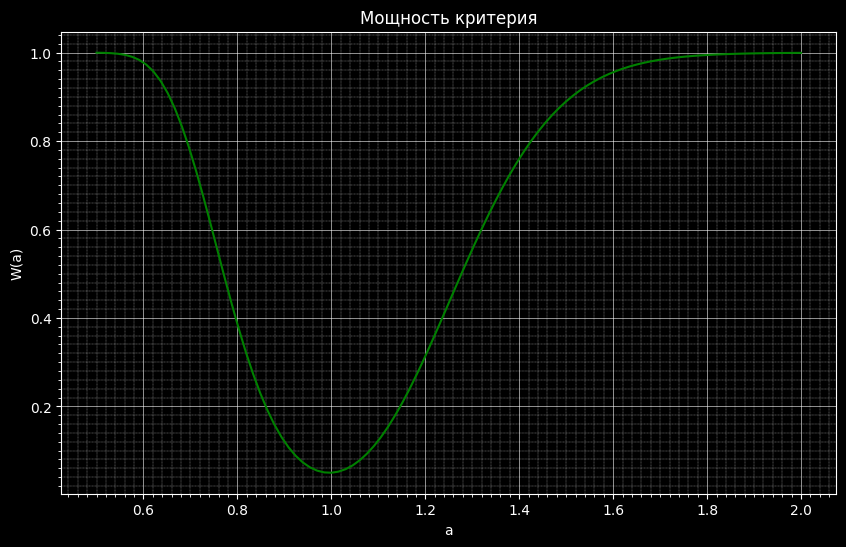

In [8]:
_, axs = polt.subplots(1, 1, figsize=(10, 6))

axs.set_title("Мощность критерия")
axs.set_xlabel("a")
axs.set_ylabel("W(a)")

a = np.linspace(0.5, 2, 100)

axs.plot(a, 1 - stats.f.cdf(quantile_1_minus_alpha_2, n - 1, m - 1, scale=a) +
         stats.f.cdf(quantile_alpha_2, n - 1, m - 1, scale=a), color="green")

axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

# polt.legend()
polt.show()